hand
0.9603471362522422 0.4442535559990905 0.016476760735369664


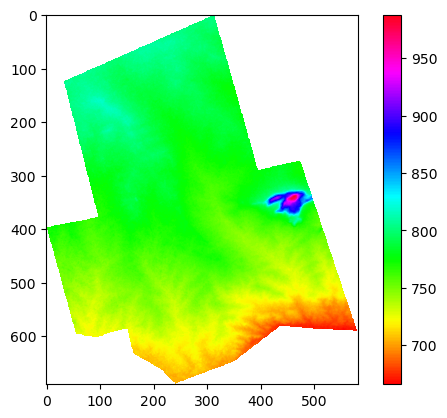

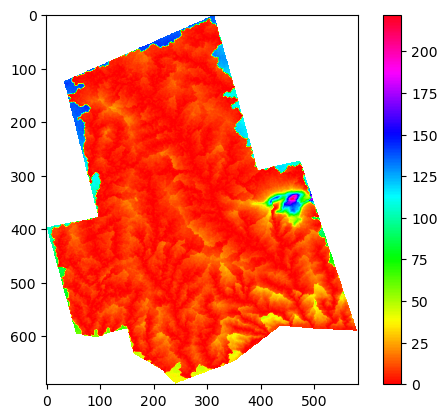

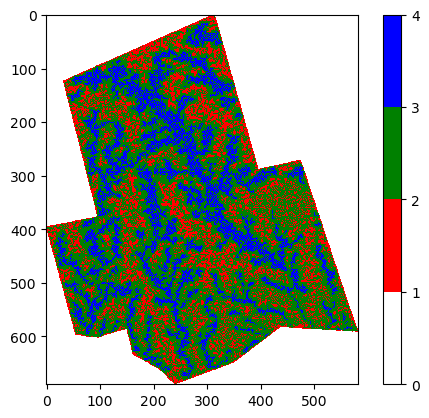

In [45]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt

DEM=np.genfromtxt('maps/dem_converted.asc',  dtype=float, autostrip=True, skip_header=6)
slope=np.genfromtxt('maps/slope_converted.asc',  dtype=float, autostrip=True, skip_header=6)
hand=np.genfromtxt('maps/HAND_asc.asc',  dtype=float, autostrip=True, skip_header = 6)
basin=np.genfromtxt('maps/basin.asc',  dtype=float, autostrip=True, skip_header = 6)




#plot DEM
plt.figure(1)
DEM[DEM==65535]=np.nan
plt.imshow(DEM, cmap='hsv')
plt.colorbar()

#plot HAND

plt.figure(2)
print("hand")
hand[hand==-3.4028234663852885981e+38]=np.nan
plt.imshow(hand, cmap='hsv')
plt.colorbar()

slope[slope==-9999]=np.nan

#make landscape classification
hillslope = np.array(slope) > 11
plateau = (np.array(hand) > 5) & (np.array(slope) <11) # slope 
wetland = np.array(hand) <= 5
basin = np.array(basin)>0


#calculate percentages
hillslope_per = float(np.sum(hillslope))/np.sum(basin) # /sum(basin)
wetland_per = float(np.sum(wetland))/np.sum(basin)
plateau_per = float(np.sum(plateau))/np.sum(basin)
print(hillslope_per, wetland_per, plateau_per)

#matrics with landscape classes
landscapes=np.zeros((690,582))
landscapes[plateau]=1
landscapes[hillslope]=2
landscapes[wetland]=3

#plot landscapes
cmap = mpl.colors.ListedColormap(['white', 'red', 'green', 'blue'])
bounds=[0,1,2,3,4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(3)
plt.imshow(landscapes, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [ ]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FLEXtopo import FLEXtopo


forcing=np.genfromtxt('wark_data/forcingWark.txt',  dtype=float, autostrip=True)

                  #      Imax Ce Sumax beta Pmax    Kf  
ParPlateau   = np.array([3.2, 0.50, 17.40, 0.95, 1.76, 0.91])   
                  #      Imax Ce Sumax beta D     Kf  
ParHillslope = np.array([3.25, 0.50, 321.99, 0.99, 0.4,0.97])
                  #      Imax Ce Sumax beta Cmax     Kf  
ParWetland   = np.array([9.94, 0.50, 53.25, 0.70, 0.65, 0.45])
              # Ks Tlag
ParCatchment = np.array([0.0281, 2.21])

#landscape percentages
landscape_per= np.array([hillslope_per, wetland_per, plateau_per])


Qm = FLEXtopo(ParPlateau, ParHillslope, ParWetland, ParCatchment, forcing[:,3:6], landscape_per)
Qo = forcing[:,3]

plt.plot(range(0,len(Qo)),Qo)
plt.plot(range(0,len(Qm)),Qm)
plt.show()